Construccion de modelos de machine learning para el dataset "kc house data"

In [94]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import locale
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [95]:
# read the data
df = pd.read_csv("kc_house_data.csv")
df.shape

(21613, 21)

El dataset consta de 21 columnas o características y abarca 21,613 registros en total. Cada registro representa una entrada única en el conjunto de datos, y nuestro análisis exploratorio y modelos de machine learning se enfocarán en extraer información valiosa de esta estructura de datos.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [97]:
numeric_variables = df.select_dtypes(include=['float64', 'int64']).columns
categorical_variables = df.select_dtypes(include=['object']).columns

num_numeric_variables = len(numeric_variables)
num_categorical_variables = len(categorical_variables)

print("Número de variables numéricas:", num_numeric_variables)
print("Número de variables categóricas:", num_categorical_variables)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas numéricas:", numeric_columns)
print("Columnas categóricas:", categorical_columns)

Número de variables numéricas: 20
Número de variables categóricas: 1
Columnas numéricas: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Columnas categóricas: ['date']


In [98]:
# Verificar campos vacíos por columna
empty_columns = df.columns[df.isnull().any()]
empty_counts = df[empty_columns].isnull().sum()

# Verificar valores nulos en total
total_missing_values = df.isnull().sum().sum()

print("Campos vacíos por columna:")
print(empty_counts)
print("\nTotal de valores nulos:", total_missing_values)

Campos vacíos por columna:
Series([], dtype: float64)

Total de valores nulos: 0


In [99]:
# Obtener la cantidad de valores únicos en cada columna y ordenar de menor a mayor
unique_value_counts_sorted = df.nunique().sort_values()

# Imprimir los resultados ordenados
print(unique_value_counts_sorted)
# 

waterfront           2
view                 5
condition            5
floors               6
grade               12
bedrooms            13
bathrooms           30
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      306
date               372
long               752
sqft_living15      777
sqft_above         946
sqft_living       1038
price             4028
lat               5034
sqft_lot15        8689
sqft_lot          9782
id               21436
dtype: int64


In [100]:

# analisis de la variable 'waterfront' (vista al agua)


# Calcular la cantidad de casas con vista al agua y sin vista al agua
waterfront_counts = df['waterfront'].value_counts()

# Crear una lista de tuplas con los datos
data = [("Con Vista", waterfront_counts[1]), ("Sin Vista", waterfront_counts[0])]

# Crear la tabla en formato Markdown
table = tabulate(data, headers=["Tipo de Vista", "Cantidad de Casas"], tablefmt="github")

# Imprimir la tabla
print(table)


| Tipo de Vista   |   Cantidad de Casas |
|-----------------|---------------------|
| Con Vista       |                 163 |
| Sin Vista       |               21450 |


In [101]:

# Establecer el locale para el formato de moneda
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Calcular el precio promedio por tipo de vista al agua
average_price_by_waterfront = df.groupby('waterfront')['price'].mean()

# Crear una lista de tuplas con los datos
data = [("Sin Vista", locale.currency(average_price_by_waterfront[0], grouping=True)),
        ("Con Vista", locale.currency(average_price_by_waterfront[1], grouping=True))]

# Crear la tabla en formato Markdown
table = tabulate(data, headers=["Tipo de Vista", "Precio Promedio"], tablefmt="github")

# Imprimir la tabla
print(table)



| Tipo de Vista   | Precio Promedio   |
|-----------------|-------------------|
| Sin Vista       | $531,563.60       |
| Con Vista       | $1,661,876.02     |


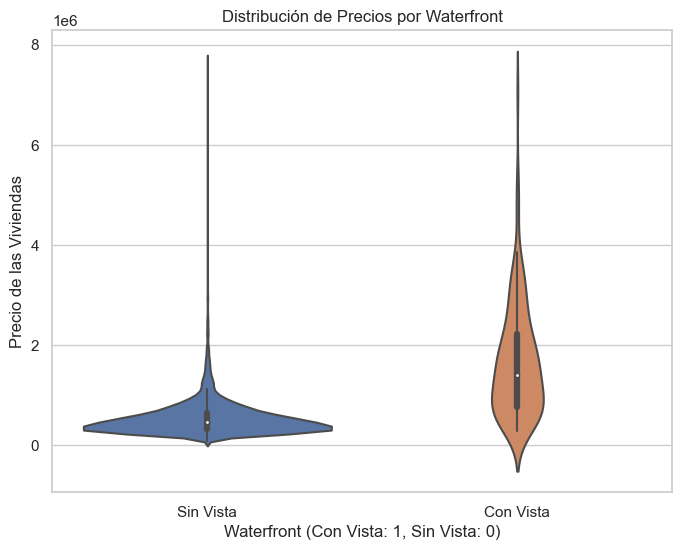

In [102]:

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de violín
plt.figure(figsize=(8, 6))
sns.violinplot(x='waterfront', y='price', data=df)
plt.title('Distribución de Precios por Waterfront')
plt.xlabel('Waterfront (Con Vista: 1, Sin Vista: 0)')
plt.ylabel('Precio de las Viviendas')
plt.xticks([0, 1], ['Sin Vista', 'Con Vista'])
plt.show()

### Analisis de la variable "waterfront"

esta variable indica si la vivienda tiene vista al agua o no, 

podemos observar que es una variable categorica
se puede observar que la mayoria de viviendas no tienen vista al agua

## Estructuramos los datos


| Columna        | Descripción                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| id             | ID único para cada casa vendida                                                              |
| date           | Fecha de la venta de la casa                                                                  |
| price          | Precio de cada casa vendida                                                                   |
| bedrooms       | Número de dormitorios                                                                         |
| bathrooms      | Número de baños, donde .5 representa un cuarto con inodoro pero sin ducha                   |
| sqft_living    | Metraje cuadrado del espacio interior del apartamento                                         |
| sqft_lot       | Metraje cuadrado del terreno                                                                 |
| floors         | Número de pisos                                                                               |
| waterfront     | Variable que indica si el apartamento tiene vista al agua o no                     |
| view           | Un índice del 0 al 4 que indica la calidad de la vista de la propiedad. 0 = Sin vista, 1 = Regular, 2 = Promedio, 3 = Buena, 4 = Excelente    |
| condition      | Un índice del 1 al 5 sobre la condición del apartamento. 1 = Mal estado, 2 = Regular - Mal estado, 3 = Promedio, 4 = Buen estado, 5 = Muy buen estado |
| grade          | Un índice del 1 al 13, donde 1-3 indica construcción y diseño insuficiente, 7 es promedio y 11-13 es alta calidad de construcción y diseño |
| sqft_above     | Metraje cuadrado del espacio interior sobre el nivel del suelo                               |
| sqft_basement  | Metraje cuadrado del espacio interior bajo el nivel del suelo                                 |
| yr_built       | Año en que se construyó la casa                                                               |
| yr_renovated   | Año de la última renovación de la casa                                                        |
| zipcode        | Área del código postal en la que se encuentra la casa                                         |


In [103]:
y = df["price"]
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade']
X = df[features]
# dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# creamos el modelo
model_dtr = DecisionTreeRegressor(random_state=1)
# entrenamos el model
model_dtr.fit(X_train, y_train)
# calculamos el mae
val_predictions = model_dtr.predict(X_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print(" MAE arbol de decision: {:,.0f}".format(val_mae))

 MAE arbol de decision: 185,193


In [105]:
model_dtr = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model_dtr.fit(X_train, y_train)
val_predictions = model_dtr.predict(X_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print(" MAE para arbol de decisioncambiando max_leaf_nodes = 100: {:,.0f}".format(val_mae))

 MAE para arbol de decisioncambiando max_leaf_nodes = 100: 153,083
